## Reinforcement Learning

The idea of Reinforcement learning is to let the model explore the enviroment itself, it is similar to when a human tries to learn a game by playing it, he makes mistakes along the way and tries to remeber them and not repeat them.

There different types of Reinforcement learning, in this example we'll talk about ***Q-learning***.

Terminology
Before we dive into explaining reinforcement learning we need to define a few key peices of terminology.

**Enviornemt** In reinforcement learning tasks we have a notion of the enviornment. This is what our agent will explore. An example of an enviornment in the case of training an AI to play say a game of mario would be the level we are training the agent on.

**Agent** an agent is an entity that is exploring the enviornment. Our agent will interact and take different actions within the enviornment. In our mario example the mario character within the game would be our agent.

**State** always our agent will be in what we call a state. The state simply tells us about the status of the agent. The most common example of a state is the location of the agent within the enviornment. Moving locations would change the agents state.

**Action** any interaction between the agent and enviornment would be considered an action. For example, moving to the left or jumping would be an action. An action may or may not change the current state of the agent. In fact, the act of doing nothing is an action as well! The action of say not pressing a key if we are using our mario example.

**Reward** every action that our agent takes will result in a reward of some magnitude (positive or negative). The goal of our agent will be to maximize its reward in an enviornment. Sometimes the reward will be clear, for example if an agent performs an action which increases their score in the enviornment we could say they've recieved a positive reward. If the agent were to perform an action which results in them losing score or possibly dying in the enviornment then they would recieve a negative reward.

The most important part of reinforcement learning is determing how to reward the agent. After all, the goal of the agent is to maximize its rewards. This means we should reward the agent appropiatly such that it reaches the desired goal.

## Qlearning


The idea in this technique is to learn a matrix of action-reward values, this matix is refered to as Q-Table or Q-matrix. The rows are the states and the columns are the actions, the  cells represent the rewards we'll gain in case we have performed the action in the corresponding column at the state of the corresponding row.

The goal is to learn from the table the actions that will give us the maximum rewards. However if the agent follow only the q-table it can get stuck in a local maximum, to avoid that the model can randomly choose actions in the begining in order to learn the enviroment more freely. 

How to fill the values in the q-table ? 
There are 2 parameters to consider:
* learning rate, this vlaue tells us how much we can change the values in the q-table in each observation.
* Discount Factor, try to define the balance between finding the maximum value in our the current state and finding the reward from the next state. The higher the value is the more we're going to look for the future, and vice versa.

The idea is try to look forward, not only to look what reward can a get from taking an action in a certain state, but to look forward and look what reward will I gain when I move to the next state after performing this action.

In [1]:
import gym   # Importing AI gym to to train a reinforcement learning model!

In [2]:
env = gym.make('FrozenLake-v0')  # we are going to use the FrozenLake enviornment


AI gym has an observation space and action space for the enviroment.


In [3]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get the number of actions that we can do at any different state.

16
4


In [4]:
env.reset()  # reset enviornment to default state

0

In [5]:
action = env.action_space.sample()  # we can pick a random action 

In [6]:
new_state, reward, done, info = env.step(action)  
# take action and perform it on the enviroment,
# it returns information about the action : new state, the reard we got, lose or win ? ,info 

In [7]:
env.render()   # render the GUI for the enviornment to show the enviroment

  (Left)
SFFF
FHFH
FFFH
HFFG


Start, Frozen, Halls,Goal.

## Creating the model 
The task is to navigate the enviroment, got from the Start to the Goal.

#### Imports

In [8]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

#### Create the q-table
Intialize the Q-table with zero values, because at the begining the agent does not know anything about the enviroment. 

In [9]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values 
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

#### Constants

In [10]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate, the higher the learning rate is the faster it learns.
GAMMA = 0.96

#### Picking an action


```
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values
```



#### Updating Q values

```
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])
```



## Putting it Together

In [15]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [16]:
rewards = [] # save all the rewards that we will get 
for episode in range(EPISODES):

  state = env.reset() # reset to get the starting state
  for _ in range(MAX_STEPS): # explore the enviroment up to the max step
    
    if RENDER:
      env.render()

    # Take an action
    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])
    next_state, reward, done, _ = env.step(action)

    # Updating the q-table
    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    #Updating the current state variable
    state = next_state

    # If the agent die, lost, ...
    if done: 
      rewards.append(reward) # Get the reward, 0 if died, and 1 every time we move to a valid spot
      epsilon -= 0.001 # reduce the epsilon if we lost, reduce it slowly to 
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[3.59407054e-01 3.59579356e-02 3.89163065e-02 3.97550718e-02]
 [3.00132762e-03 1.00184038e-02 1.69785514e-02 4.20600522e-01]
 [9.97465579e-03 1.10057532e-02 1.73192325e-02 3.41453678e-01]
 [1.30503523e-02 9.58107395e-03 7.74275009e-03 1.13654005e-01]
 [5.02889575e-01 2.96568914e-03 6.02689313e-03 8.32417618e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.29978236e-04 5.39622019e-04 3.15695739e-01 7.61175600e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.92989730e-02 2.30439433e-03 1.43544438e-02 3.77200877e-01]
 [8.60834521e-03 2.52653313e-01 3.00964173e-02 1.66549363e-02]
 [8.12261462e-01 1.04273512e-03 1.46362176e-03 4.83486964e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.45015131e-02 4.00618469e-02 4.38079124e-01 2.55407815e-02]
 [1.10384373e-01 9.85800901e-01 1.29164778e-01 1.37423383e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

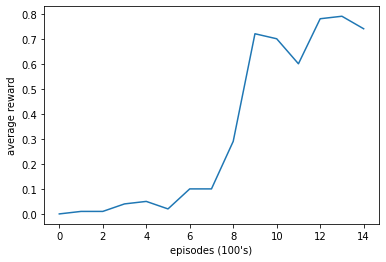

In [17]:
# we can plot the training progress and see how the agent improved
# we are plotting the average reward over a hundred step from the begining to the end
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()